<a href="https://colab.research.google.com/github/stripathy/valiante_lab_abf_process/blob/master/valiante_lab_raw_ephys_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Illustrating download and plotting of valiante lab raw ephys datasets

Notebook written by [Shreejoy Tripathy](https://triplab.org), with datasets collected and compiled by Homeira Moradi-Chameh in the lab of [Dr. Taufik Valiante](http://www.neurontobrainlaboratory.ca/). A scientific description and reference to the datasets is available on [bioRxiv](https://www.biorxiv.org/content/10.1101/748988v2).

# Using Allen Institute's feature extraction library, IPFX
I've been using the allen institute intracellular ephys feature extraction toolbox, [IPFX](https://https://github.com/AllenInstitute/ipfx). It has some nice, straightforward data structures for intracellular ephys data and I've structured Homeira's data files from ABF into this structure.

In [0]:
# this downloads and installs the IPFX repo from github
!pip install git+https://github.com/AllenInstitute/ipfx.git

# Downloading Valiante Lab raw ephys data from Github
I've organized the abf-file based intrinsic ephys data into IPFX sweep set objects, located [here](https://github.com/stripathy/valiante_lab_abf_process/tree/master/sweep_sets). The lines below show how to download these files directly from github. They are stored on github as python pickle objects.

In [20]:
# download file from github repo

intrinsic_file_name = '13d03005.abf'
url = "https://github.com/stripathy/valiante_lab_abf_process/blob/master/sweep_sets/%s.p?raw=true" % (intrinsic_file_name) # dl=1 is important

https://github.com/stripathy/valiante_lab_abf_process/blob/master/sweep_sets/13d03005.abf.p?raw=true


In [0]:
# download the file, write it to collab disk, and then load it into memory using python pickle library
import urllib.request
u = urllib.request.urlopen(url)
data = u.read()
u.close()
filename = intrinsic_file_name + '.p'
with open(filename, "wb") as f :
    f.write(data)

import pickle
#print(data)

# load the file into a python object called sweep_set
with open(filename, 'rb') as fp:
    sweep_set = pickle.load(fp)

# Load and plot intrinsic ephys data from IPFX SweepSet objects

In [26]:
# sweep_set is the ipfx object that stores the intrinsic ephys data from a particular cell. 
# It's organized into a list of Sweep objects and by increasing step current injection
sweep_set.sweeps

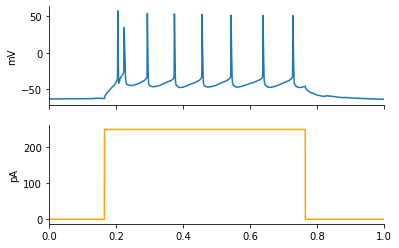

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ipfx.sweep import Sweep, SweepSet

sweep_plot_index = 13
curr_sweep = sweep_set.sweeps[sweep_plot_index]
t = curr_sweep.t
v = curr_sweep.v
i = curr_sweep.i

fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].plot(t, v)
axes[0].set_xlim(0, 1)
axes[0].set_ylabel("mV")

axes[1].plot(t, i, c="orange")
axes[1].set_ylabel("pA")

sns.despine()